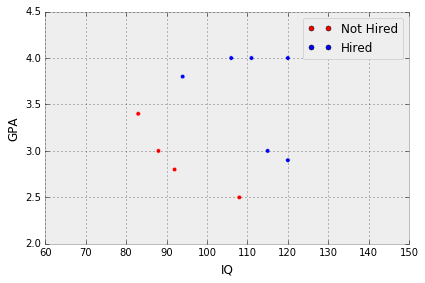

In [41]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
IQ = [88, 120, 111, 83, 94, 106, 108, 92, 115, 120]
GPA = [3.0, 2.9, 4.0, 3.4, 3.8, 4.0, 2.5, 2.8, 3.0, 4.0]
Hired = [0, 1, 1, 0, 1, 1, 0, 0, 1, 1]
colors = ["red", "blue"]

#plt.figure(figsize=(200,400))
plt.scatter(IQ, GPA, c=Hired, cmap=matplotlib.colors.ListedColormap(colors))

red, = plt.plot([], "ro", markersize=5)
blue, = plt.plot([], "bo", markersize=5)

plt.legend([red, blue], ["Not Hired", "Hired"])

plt.style.use('bmh')
plt.axis([60,150,2.0,4.5])
plt.xlabel("IQ")
plt.ylabel("GPA")
plt.tight_layout()
plt.savefig("scatter.png")
plt.show()

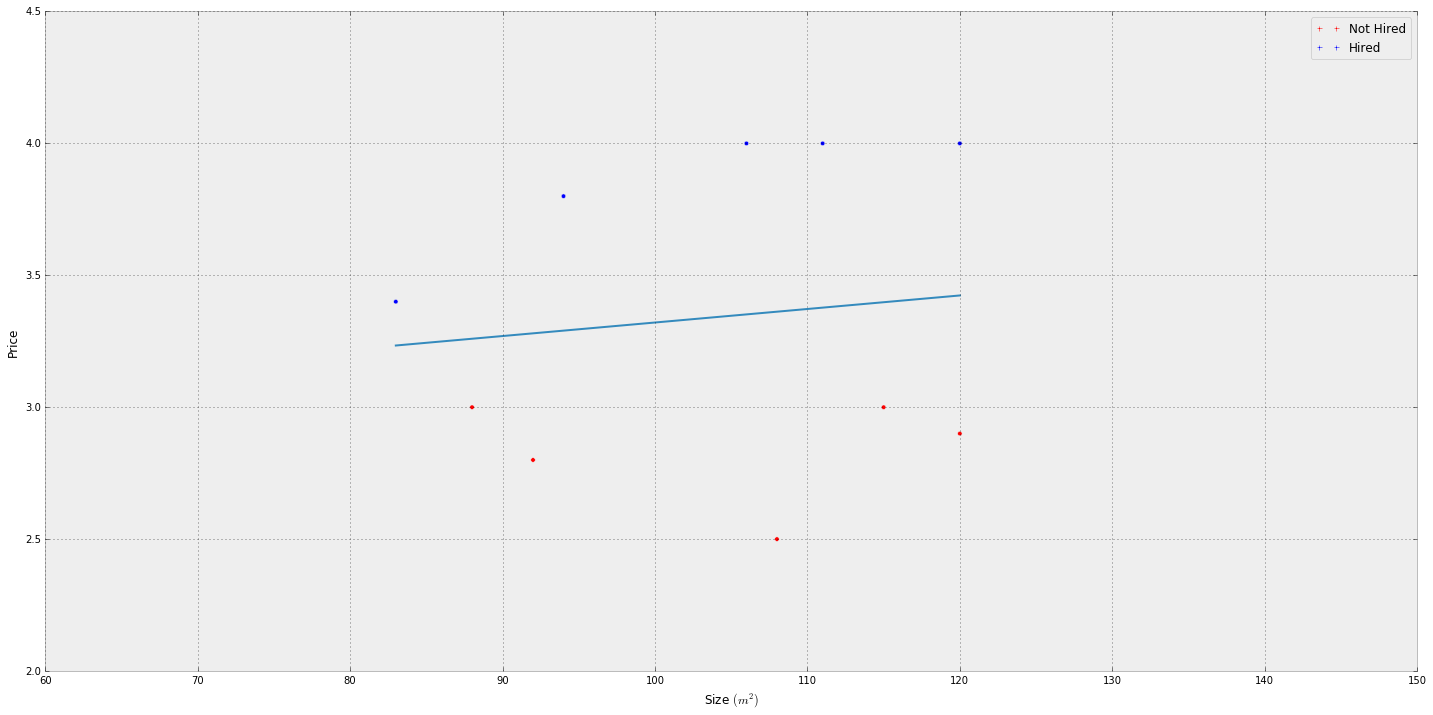

In [406]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

IQ = [88, 120, 111, 83, 94, 106, 108, 92, 115, 120]
GPA =    [3.0, 2.9, 4.0, 3.4, 3.8, 4.0, 2.5, 2.8, 3.0, 4.0]
labels = [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]
colors = ["red", "blue"]

#plt.figure(figsize=(200,400))

#red, = plt.plot([], "r+", markersize=5)
#blue, = plt.plot([], "b+", markersize=5)

plt.figure(figsize=(20,10))
plt.plot(np.unique(IQ), np.poly1d(np.polyfit(IQ, GPA, 1))(np.unique(IQ)))
plt.scatter(IQ, GPA, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.legend([red, blue], ["Not Hired", "Hired"])
plt.style.use('bmh')
plt.axis([60,150,2.0,4.5])
plt.xlabel(r"Size $(m^{2})$")
plt.ylabel("Price")
plt.tight_layout()
plt.savefig("wallpaper.png")
plt.show()

In [410]:
# Initializing the data in Python 
IQ = [88, 120, 111, 83, 94, 106, 108, 92, 115, 120]
GPA = [3.0, 2.9, 4.0, 3.4, 3.8, 4.0, 2.5, 2.8, 3.0, 4.0]
labels = [0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]

# Initializing the function coefficients 
coefficient = np.array([1.0, 1.0, 1.0])

# Normalize features
def normalize(features):
    mean = sum(features)/float(len(features))
    minimum = min(features)
    maximum = max(features)
    return [(feature-mean)/(maximum-minimum) for feature in features]

examples = np.ones((3,10))
examples[1] = normalize(IQ)
examples[2] = normalize(GPA)

def test(examples):
    error = 0
    global coefficient
    for example, label in zip(examples.T, labels):
        output = coefficient.dot(example.T)
        if output > 0:
            output = 1
        else:
            output = 0
        error += label - output
    return error/len(examples)

def train(examples, epochs=25):
    global coefficient
    for i in range(epochs):
        for example, label in zip(examples.T, labels):
            output = coefficient.dot(example.T)
            if output > 0:
                output = 1
            else:
                output = 0
            error = label - output
            coefficient += 0.01*error*example
        if (i+1)%5 == 0:
            print("Error at " + str(i+1) + " epochs:\t" + str(test(examples)))
        
train(examples)

Error at 5 epochs:	-1.3333333333333333
Error at 10 epochs:	-0.6666666666666666
Error at 15 epochs:	-0.3333333333333333
Error at 20 epochs:	0.0
Error at 25 epochs:	0.0


In [382]:
coefficient

array([ 0.4       ,  1.11945946,  1.18266667])

In [412]:
examples.T[0]

array([ 1.        , -0.42432432, -0.22666667])

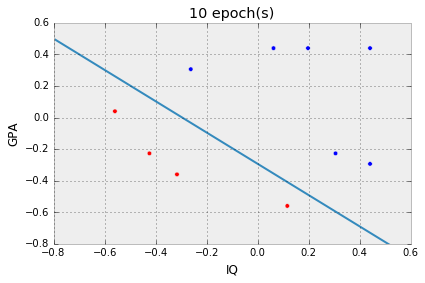

In [394]:
e = 10
grad = (-coefficient[0]/coefficient[2])/-(-coefficient[0]/coefficient[1])
new_x = [1, (-coefficient[0]/coefficient[1])+grad] 
new_y = [(-coefficient[0]/coefficient[2]) + 1*grad , 1]
x = normalize(IQ)
y = normalize(GPA)

Hired = [0, 1, 1, 0, 1, 1, 0, 0, 1, 1]
colors = ["red", "blue"]

#plt.figure(figsize=(200,400))
plt.scatter(x, y, c=Hired, cmap=matplotlib.colors.ListedColormap(colors))

red, = plt.plot([], "ro", markersize=5)
blue, = plt.plot([], "bo", markersize=5)

#plt.legend([red, blue], ["Not Hired", "Hired"])

plt.plot(np.unique(new_x), np.poly1d(np.polyfit(new_x, new_y, 1))(np.unique(new_x)))
plt.title(str(e)+" epoch(s)")
plt.style.use('bmh')
plt.axis([-0.8,0.6,-0.8,0.6])
plt.xlabel("IQ")
plt.ylabel("GPA")
plt.tight_layout()
plt.savefig("epoch_"+str(e)+".png")
plt.show()